<a href="https://colab.research.google.com/github/Kriszti8828/6het/blob/mergel/beadando_maxmin_ipynb_m%C3%A1solata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Package-ek importálása

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import scipy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Adatbázisok importálása, tisztítás

In [3]:
#Adatbázisok importálása
df_dbe=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/DBE.csv') #DBE
df_pbj=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/PBJ.csv') #PBJ
df_xlb=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/XLB.csv') #XLB
df_bil=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/BIL.csv') #BIl
df_qqq=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/QQQ.csv') #QQQ


In [4]:
#YC importálása
df_yc=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/DGS3MO.csv')
#df_yc.head()
#az értelmezhetetlen karakter eliminációja, számmá alakítás
df_yc['DGS3MO']=df_yc['DGS3MO'].replace('.',10000).astype(float)
df_yc['DGS3MO']=df_yc['DGS3MO'].astype(float)

#És a nagy szám helyett a két szomszédos elem átlagának a beírása
for i in range(len(df_yc)):
  if df_yc['DGS3MO'][i]==10000:
    df_yc['DGS3MO'][i]=(df_yc['DGS3MO'][i-1]+df_yc['DGS3MO'][i+1])/2
  if df_yc['DGS3MO'][i]==0:
    df_yc['DGS3MO'][i]==df_yc['DGS3MO'][i-1]




<ipython-input-4-2226c5596487>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yc['DGS3MO'][i]=(df_yc['DGS3MO'][i-1]+df_yc['DGS3MO'][i+1])/2


In [5]:
#A megfelelő hozamok közö dataframebe illesztése
#Az üres df. létrehozása
df_hozam=pd.DataFrame(columns={'Date','dbe','pbj','xlb','bil','qqq','yc'})
#Feltöltés a dátummal
df_hozam['Date']=df_qqq['Date'].copy()

In [6]:
#Feltöltés az ETF-ek adj. close adatával
df_hozam['dbe']=df_dbe['Adj Close'].copy()
df_hozam['pbj']=df_pbj['Adj Close'].copy()
df_hozam['xlb']=df_xlb['Adj Close'].copy()
df_hozam['bil']=df_bil['Adj Close'].copy()
df_hozam['qqq']=df_qqq['Adj Close'].copy()

#és a hozamgörbével
df_hozam['yc']=df_yc['DGS3MO'].copy()


In [7]:
#A dátum szerint indexelünk
df_hozam=df_hozam.set_index('Date')
df_hozam.index = pd.to_datetime(df_hozam.index)

In [8]:
#Ellenőrzés
df_hozam.head(20)

,qqq,yc,bil,dbe,xlb,pbj
Date,,,,,,
2008-01-02,44.299957,3.260,85.052963,34.557426,29.851694,13.911901
2008-01-03,44.484505,3.240,84.997299,34.330193,30.393787,13.920213
2008-01-04,42.533573,3.200,84.978714,34.140842,29.475840,13.595911
2008-01-07,42.331459,3.270,85.052963,33.336082,29.071068,13.845374
2008-01-08,41.232960,3.250,84.997299,33.610649,28.622932,13.687383
2008-01-09,42.111755,3.220,84.941589,33.307674,28.803635,13.803798
2008-01-10,42.173275,3.240,84.978714,32.947899,29.193937,14.011689
2008-01-11,41.347191,3.090,85.015854,32.559715,28.897604,13.654121
2008-01-14,42.067822,3.190,85.090065,33.165657,29.866159,13.670752


In [9]:
#a hozam kiszámítása
df_ret=pd.DataFrame(columns={'dbe','pbj','xlb','bil','qqq','yc'})
df_ret['dbe']=df_hozam['dbe']/df_hozam['dbe'].shift(1)-1
df_ret['pbj']=df_hozam['pbj']/df_hozam['pbj'].shift(1)-1
df_ret['xlb']=df_hozam['xlb']/df_hozam['xlb'].shift(1)-1
df_ret['bil']=df_hozam['bil']/df_hozam['bil'].shift(1)-1
df_ret['qqq']=df_hozam['qqq']/df_hozam['qqq'].shift(1)-1
df_ret['yc']=(df_hozam['yc']+1)/(df_hozam['yc']+1).shift(1)-1


In [10]:
#A dátum szerint indexelünk
df_ret.index = pd.to_datetime(df_ret.index)

In [11]:
#Ellenőrzés
df_ret.head(10)

,qqq,yc,bil,dbe,xlb,pbj
Date,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,0.004166,-0.004695,-0.000654,-0.006576,0.018160,0.000597
2008-01-04,-0.043856,-0.009434,-0.000219,-0.005516,-0.030202,-0.023297
2008-01-07,-0.004752,0.016667,0.000874,-0.023572,-0.013732,0.018348
2008-01-08,-0.025950,-0.004684,-0.000654,0.008236,-0.015415,-0.011411
2008-01-09,0.021313,-0.007059,-0.000655,-0.009014,0.006313,0.008505
2008-01-10,0.001461,0.004739,0.000437,-0.010802,0.013550,0.015060
2008-01-11,-0.019588,-0.035377,0.000437,-0.011782,-0.010150,-0.025519
2008-01-14,0.017429,0.024450,0.000873,0.018610,0.033517,0.001218


In [12]:
#A hozamgörbe manipulálása
from math import nan
#df_ret['yc'].plot()
for i in range(len(df_ret['yc'])):
  if df_ret['yc'][i]==np.NaN:
    df_ret['yc'][i]=0
  if df_ret['yc'][i]<-100:
    df_ret['yc'][i]=0
  if df_ret['yc'][i]>100:
    df_ret['yc'][i]=0

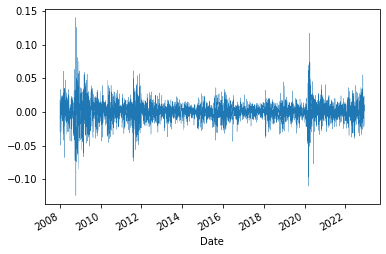

In [13]:
#Ellenőző plot az etf-ekhez
df_ret['xlb'].plot(linewidth=0.3)

In [14]:
print(df_ret['yc'][0:252*5].mean()*252)

-0.12107720415312563


In [15]:
#A végtelen és a 0 adatok kezelése
df_ret=df_ret.replace(np.inf,np.nan).astype(float)

In [16]:
#Az yc nélküli hozamok, adatbázis
df_hozam2=df_hozam.copy()
#df_hozam2.head()
df_hozam2=df_hozam2.drop(['yc'], axis=1)
df_hozam_gsh=df_hozam2.copy() #Adatbázis a globális Sharpe-rátához
df_hozam_lsh=df_hozam2.copy() #Adatbázis a csúszóablakos Sharpe-rátához

###Sharpe ráta, globális

#####A 10-11. órán felépített kódokat használva:

In [17]:
####################################################################################
def minden(price_df,w):
  return_asset = price_df/price_df.shift(1)-1
  mean_asset = return_asset.mean() * 252       #évestett átlag
  std_asset = return_asset.std() * np.sqrt(252)  #évesített szórás
  cov_asset = return_asset.cov() * 252
  corr_asset = return_asset.corr()

#Itt jön be a calc nasset mean és cov

  #N eszköz átlagos hozama, a megfelelő súlyokkal
  calc_nasset_mean=np.sum(w*mean_asset) #skalárszorzat

  #n eszköz kovarianciája a megfelelő súlyokkal
  calc_nasset_cov=np.sqrt(np.dot(np.dot(w,cov_asset), w.transpose()))
  #mátrixszorzat (np.dot)

  #A return és a szórás meghatározása
  ret = calc_nasset_mean
  std = calc_nasset_cov
  #Kockázatmentes hozamgörbe  
  
 
  return ret, std


In [18]:
ww=np.array([0,0,0,1,0])
#A fenti függvény behívása
rreturn, standev =minden(df_hozam_gsh, ww)


In [19]:
#Teszt, vektorok
print(rreturn)
print(standev)
print(rreturn/standev)

0.09947262646915708
0.2512211603117205
0.39595640090878237


In [20]:
#Kockázatmentes hozam
kockment=(df_ret['yc']).mean()*252

#####Optimalizálás

In [21]:
####################################################################################
#A célfüggvény
def elsoopt(ww):
  a1,a2=minden(df_hozam_gsh,ww)
  Sh_rate=(a1-kockment)/a2
  return Sh_rate


In [22]:
fun1 = lambda x: 100-elsoopt(x) #ide proba(x) is jöhet tesztelni

In [23]:
bounds=((0,None),(0,None),(0,None),(0,None),(0,None))
cons=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1})

In [24]:
#Az optimalizálás (~3 min volt nekem)
megoldas1_1=scipy.optimize.minimize(fun1, (0.5,0.2,0.1,0.0,0), method='SLSQP',
                        bounds=bounds,
                        constraints=cons)

In [25]:
#Az optimalizálás eredménye
print(megoldas1_1)

     fun: 99.4033781161584
     jac: array([-0.07865524, -0.02537727,  0.22085857,  0.09402466, -0.07728577])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([7.68623355e-01, 0.00000000e+00, 3.29597460e-17, 1.56125113e-17,
       2.31376645e-01])


In [26]:
#És az eredménnyel számolt hozam
rreturn, standev=minden(df_hozam_gsh,megoldas1_1['x'])
#A kapott Sharpe-ráta
print((rreturn-0.01)/standev)
#A kapott súlyok
print(np.round(megoldas1_1['x'],3))
#Ellenőrzés: az öszeg valóban 1
print(sum(megoldas1_1['x']))
#A kapott hozam
print(elsoopt(megoldas1_1['x']))

0.6264128078512218
[0.769 0.    0.    0.    0.231]
0.9999999999999999
0.5966218838416028


##Csúszóablakos Shapre ráta


In [27]:
def masodikopt(start,stop): #A fenti függvény általánosítása az időablakokhoz
#  start=5
#  stop=25
  megoldas1_1=[]
  
  for i in range(start,stop):
    
    kockment=(df_ret['yc'][(start+i):(start+i+5*252)]).mean()*252 #évesített, 5 éves ablakot néz
    def celfv(ww):
        a1,a2=minden(df_hozam_gsh[i:(i+5*252)],ww)
        Sh_rate=(a1-kockment)/a2      
        return Sh_rate

    funa = lambda x: 100-celfv(x) #max: Szám-x akkor min., ha x max.
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None))
    cons=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1})

    megoldas1_a=scipy.optimize.minimize(funa, (0.5,0.2,0.1,0.0,0), method='SLSQP',
                          bounds=bounds,
                          constraints=cons)
    megoldas1_1.append(megoldas1_a['x'])
  #for i in len(megolda)
  return megoldas1_1

In [ ]:
tesztsok=masodikopt(1,len(df_hozam2['bil']-5*252-1)) #A LE NE FUTTASD! #A futásidő ~8 perc
#print(tesztsok)
print(df_hozam_gsh.head(4))

In [ ]:
megoldas1_2=pd.DataFrame(columns={'x1','x2','x3','x4','x5'}) #A kapott megoldás táblázattá alakítása
megoldas1_2['x1']=np.zeros(len(tesztsok))
megoldas1_2['x2']=np.zeros(len(tesztsok))
megoldas1_2['x3']=np.zeros(len(tesztsok))
megoldas1_2['x4']=np.zeros(len(tesztsok))
megoldas1_2['x5']=np.zeros(len(tesztsok))
for i in range(len(tesztsok)):
  megoldas1_2['x1'][i]=tesztsok[i][0]
  megoldas1_2['x2'][i]=tesztsok[i][1]
  megoldas1_2['x3'][i]=tesztsok[i][2]
  megoldas1_2['x4'][i]=tesztsok[i][3]
  megoldas1_2['x5'][i]=tesztsok[i][4]

In [ ]:
#Az eredmények csv-re mentése:
with open('megoldas1_2.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(megoldas1_2)
print(megoldas1_2)

In [29]:
megoldas1_2=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/megoldas1_2.csv') #Hogy ne kelljen mindig újrafuttatni, itt a korábban megkapott optimumot hívjuk be
print(megoldas1_2)


      Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1            x3            x1  \
0              0             0               0  1.287263e-03  8.021869e-03   
1              1             1               1  1.437987e-03  8.017469e-03   
2              2             2               2  1.407276e-03  8.080828e-03   
3              3             3               3  1.562880e-03  8.011262e-03   
4              4             4               4  1.433480e-03  8.091768e-03   
...          ...           ...             ...           ...           ...   
3753        3753          3753            3753  1.000000e+00  0.000000e+00   
3754        3754          3754            3754  6.812953e-12  0.000000e+00   
3755        3755          3755            3755  0.000000e+00  2.362316e-11   
3756        3756          3756            3756  1.000000e-01  5.000000e-01   
3757        3757          3757            3757  1.000000e-01  5.000000e-01   

                x2            x5            x4  
0     9.892230

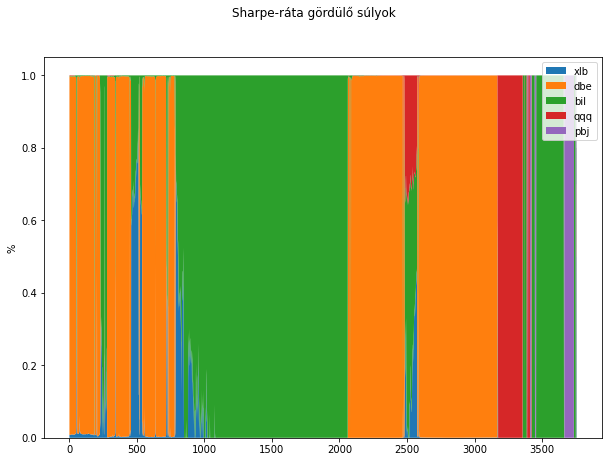

In [30]:
#Ábrázolás: Sharpe-ráta optimalizálással gördülő súlyok
ay = megoldas1_2['x1'] #pbj
by = megoldas1_2['x2'] #dbe
cy = megoldas1_2['x3'] #xlb
dy = megoldas1_2['x4'] #qqq
ey = megoldas1_2['x5'] #bil
y = np.vstack([ay, by, cy,dy,ey])
sulyok=np.array([ay, by, cy,dy,ey])
# plot
fig, ax = plt.subplots(figsize=(10,7))
x=df_bil['Date'][0:len(ay)]
plt.xlim=(x)
ax.stackplot(megoldas1_2.index, y)
plt.legend(['xlb','dbe','bil','qqq','pbj'])
plt.suptitle('Sharpe-ráta gördülő súlyok')
plt.ylabel('%')
plt.savefig("gordulosharpe.png") 
plt.show()

In [31]:
###################Returnök kiszámítása

In [32]:
#Returnök visszaadása: üres adatbázis létrehozása
gordreturn=pd.DataFrame(columns={'return'})
gordreturn['return']=np.zeros(len(sulyok[0]))

In [33]:
#Ellenőrzés
df_ret.head(3)

,qqq,yc,bil,dbe,xlb,pbj
Date,,,,,,
2008-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2008-01-03,0.004166,-0.004695,-0.000654,-0.006576,0.018160,0.000597
2008-01-04,-0.043856,-0.009434,-0.000219,-0.005516,-0.030202,-0.023297


In [34]:
#A súlyfüggvények
print(sulyok)

[[8.02186930e-03 8.01746895e-03 8.08082763e-03 ... 2.36231590e-11
  5.00000000e-01 5.00000000e-01]
 [9.89223014e-01 9.89116242e-01 9.89108529e-01 ... 0.00000000e+00
  2.00000000e-01 2.00000000e-01]
 [1.28726317e-03 1.43798738e-03 1.40727635e-03 ... 0.00000000e+00
  1.00000000e-01 1.00000000e-01]
 [1.46785396e-03 1.42830205e-03 1.40336734e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.72409812e-13 1.09212277e-13 5.03130034e-14 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]


In [35]:
#A súlyfüggvények np. array-é alakítása, mert így tud lefutni a 'minden' kód
df_suly1_2=megoldas1_2[['x1','x2','x3','x4','x5']]
sulyarray=[]

for i in range(len(df_suly1_2['x1'])):
  sulyarray.append([])
  for j in range(5):
    sulyarray[i].append(df_suly1_2[df_suly1_2.columns[j]][i])
  sulyarray[i]=np.array(sulyarray[i])

In [36]:
#Ellenőrzés: valóban np. array
print(type(sulyarray[1]))

<class 'numpy.ndarray'>


In [37]:
#A returnök kiszámolása a csúszóablakos módszernél
gordreturn['return']=np.zeros(len(megoldas1_2['x1']))
gordreturn['szoras']=np.zeros(len(megoldas1_2['x1']))

for i in range(len(megoldas1_2['x1'])):  
  gordreturn['return'][i]=minden(df_hozam_gsh[i:(i+5*252)],sulyarray[i])[0]
  gordreturn['szoras'][i]=minden(df_hozam_gsh[i:(i+5*252)],sulyarray[i])[1] #a return és a szórás oszlopok feltöltése a korábban bemutatott függvénnyel

  #df_ret[df_ret.columns[1]]*megoldas1_2['x1'][i] #pbj #az index 1-nél indul, mert a 0. az yc
  

In [38]:
#Dátum hozzáadása
gordreturn['Date']=df_bil['Date'][0:len(gordreturn['return'])]
print(gordreturn.head(4))
gordreturn=gordreturn.set_index('Date')
gordreturn.index = pd.to_datetime(gordreturn.index)

     return    szoras        Date
0  0.004153  0.007795  2008-01-02
1  0.004258  0.007791  2008-01-03
2  0.004428  0.007787  2008-01-04
3  0.004177  0.007780  2008-01-07


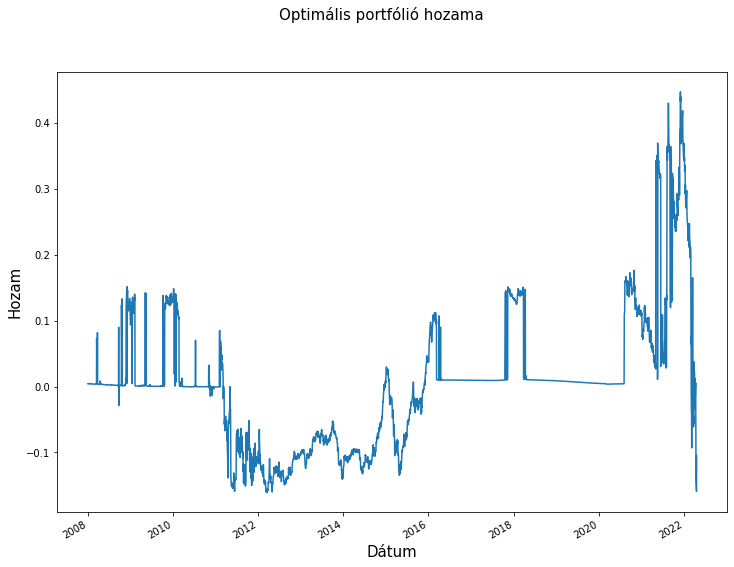

In [39]:
#A csúszóablakos optimális returnök ábrázolása

plt.figure(figsize=(12, 9))
gordreturn['return'][1:3600].plot()
plt.suptitle('Optimális portfólió hozama', fontsize=15)
plt.ylabel('Hozam', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("sharpegordhozam.png") 
plt.show()

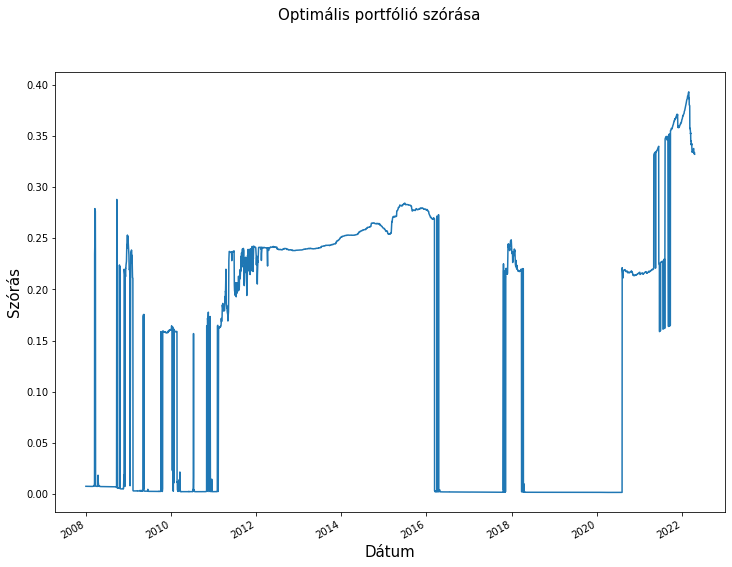

In [40]:
#A csúszóablakos optimális szórások ábrázolása
#Az alacsony hozam mellett alacsony szórás van
plt.figure(figsize=(12, 9))
gordreturn['szoras'][1:3600].plot() 
plt.suptitle('Optimális portfólió szórása', fontsize=15)
plt.ylabel('Szórás', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("sharpegordszoras.png") 
plt.show()

In [41]:
#minden(df_hozam_gsh[1:(1+5*252)],df_suly1_2[1:(1+1)])
minden(df_hozam_gsh,np.array([1,0,0,0,0]))

(0.15177665171749638, 0.229181368665573)

##Maximum drawdown minimalizálása

###Adatbázis kialakítása

#####A fentiektől eltérően itt naponta kell hozamot vizsgálni (a min. max. drawdownhoz), így új függvények és adatbázisok szükségesek

In [42]:
#Súlyok
w=[0,1,0,0,0]

In [43]:
print(df_hozam2)

                   qqq        bil        dbe        xlb        pbj
Date                                                              
2008-01-02   44.299957  85.052963  34.557426  29.851694  13.911901
2008-01-03   44.484505  84.997299  34.330193  30.393787  13.920213
2008-01-04   42.533573  84.978714  34.140842  29.475840  13.595911
2008-01-07   42.331459  85.052963  33.336082  29.071068  13.845374
2008-01-08   41.232960  84.997299  33.610649  28.622932  13.687383
...                ...        ...        ...        ...        ...
2022-11-29  280.570007  91.409996  23.540001  80.800003  47.740002
2022-11-30  293.359985  91.409996  24.139999  82.750000  48.410000
2022-12-01  293.720001  91.430000  23.980000  82.849998  48.119999
2022-12-02  292.549988  91.440002  23.480000  83.760002  48.299999
2022-12-05  287.640015  91.449997  22.570000  82.099998  47.660000

[3759 rows x 5 columns]


In [44]:
#Létrehozunk egy eredmény oszlopot a súlyokkal számolt returnhöz
df_hozam2['eredmeny']=0
print(df_hozam2['eredmeny'])

Date
2008-01-02    0
2008-01-03    0
2008-01-04    0
2008-01-07    0
2008-01-08    0
             ..
2022-11-29    0
2022-11-30    0
2022-12-01    0
2022-12-02    0
2022-12-05    0
Name: eredmeny, Length: 3759, dtype: int64


In [45]:
#Feltöltjük
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['dbe']*w[0]
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['qqq']*w[1]
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['pbj']*w[2]
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['xlb']*w[3]
df_hozam2['eredmeny']=df_hozam2['eredmeny']+df_ret['bil']*w[4]


In [46]:
#2. lehetőség: for ciklust írunk rá
df_hozam3=pd.DataFrame(columns={'eredmeny'})
df_hozam3['eredmeny']=df_hozam2['eredmeny'].copy()
df_hozam3['eredmeny']=0
print(df_hozam3.head(5))

            eredmeny
Date                
2008-01-02         0
2008-01-03         0
2008-01-04         0
2008-01-07         0
2008-01-08         0


In [47]:
#Feltöltjük a skalárszorzatokkal
for i in range(len(df_hozam2.columns)-2):
  df_hozam3['eredmeny']=df_hozam3['eredmeny']+df_ret[df_hozam2.columns[i]]*w[i]

print(df_hozam3['eredmeny'])

Date
2008-01-02         NaN
2008-01-03   -0.000654
2008-01-04   -0.000219
2008-01-07    0.000874
2008-01-08   -0.000654
                ...   
2022-11-29    0.000327
2022-11-30    0.000000
2022-12-01    0.000219
2022-12-02    0.000109
2022-12-05    0.000109
Name: eredmeny, Length: 3759, dtype: float64


In [48]:
#Teszt
print(df_hozam2['eredmeny'])

Date
2008-01-02         NaN
2008-01-03    0.004166
2008-01-04   -0.043856
2008-01-07   -0.004752
2008-01-08   -0.025950
                ...   
2022-11-29   -0.007570
2022-11-30    0.045586
2022-12-01    0.001227
2022-12-02   -0.003983
2022-12-05   -0.016783
Name: eredmeny, Length: 3759, dtype: float64


In [49]:
#A portfólió hozamának a kiszámítása
df_hozam2['return']=np.zeros
df_hozam2['return'][0]=1

df_hozam2['return']=df_hozam2['eredmeny']
df_hozam2['return'][0]=1
df_hozam2['return'][1]=df_hozam2['return'][0]*(1+df_hozam2['eredmeny'][1])



for i in range(len(df_hozam2['eredmeny'])-1):
  df_hozam2['return'][i+1]=(df_hozam2['eredmeny'][i+1]+1)*df_hozam2['return'][i]

<ipython-input-49-abbf480cf5d3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hozam2['return'][0]=1


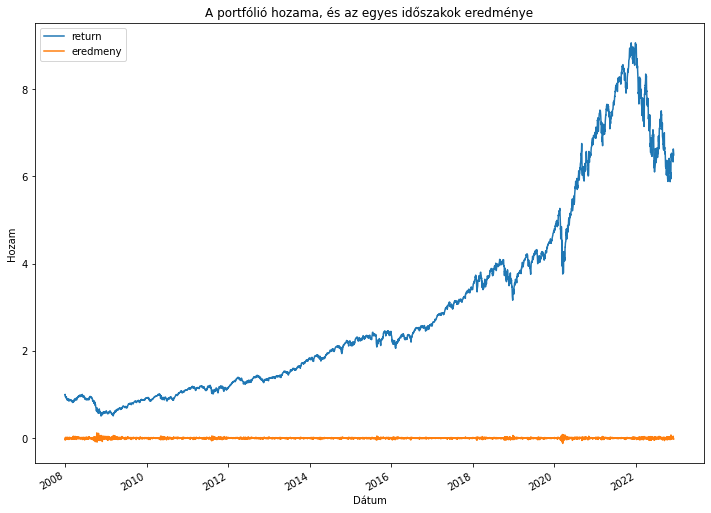

In [50]:
#Ellenőrzések
#print(df_hozam2['return'],df_hozam2['eredmeny'])
#df_hozam2[['eredmeny','return']].plot()
df_hozam2[['return','eredmeny']].plot(title="A portfólió hozama, és az egyes időszakok eredménye",figsize=(12, 9))
plt.ylabel('Hozam')
plt.xlabel('Dátum')
plt.show()

In [51]:
def hozamdf(df1,df2, ww): #a súlyok segítségével naponta számol hozamot, df1 a hozam, df2 a return értékek adatbázisa

  adatsor=df1.copy() #így annyi sorból áll, mint az eredeti df
  adatsor['eredmeny']=0
  for i in range(len(df1.columns)-2):
    adatsor['eredmeny']=adatsor['eredmeny']+df2[df1.columns[i]]*ww[i] #a súlyokkal súlyozunk, hogy megfelelő legyen a hozam


  adatsor['return']=np.zeros
  adatsor['return'][0]=1
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot

  for i in range(len(adatsor['eredmeny'])-1):
    adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]

  return adatsor['return']

<ipython-input-51-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-51-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-51-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


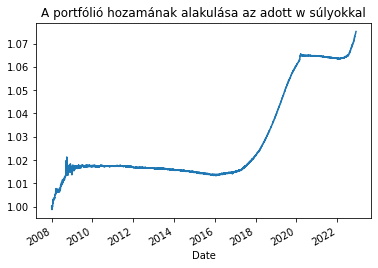

In [52]:
#Ellenőrzés
qq=hozamdf(df_hozam2,df_ret,w)
#print(qq.head(-5))
fig=qq.plot(title="A portfólió hozamának alakulása az adott w súlyokkal",
            )
#fig.legend="return"

plt.show(fig)

In [53]:
def maxmin(ww): #Ez a függvény számolja ki a drawdown mértékét (a minimalizáláshoz is ezt fogjuk használni)
  qq=hozamdf(df_hozam2,df_ret,ww)
  kicsi=min(qq)
  a=0 
  for i in qq:
    a=a+1
    if i == kicsi: 
      break
  nagy=0
  for j in range(0,a):
    if qq[j]>nagy:
      nagy=qq[j]
  return (nagy-kicsi)/nagy


In [54]:
#Ellenőrzés
drawd=maxmin(w)
print(drawd)


<ipython-input-51-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-51-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-51-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


0.0013094664321101623


####Optimalizálás

In [55]:
#Szükséges package-ek importálása
import seaborn as sns

import scipy

In [56]:
#Egy egyszerűen ellenőrizhető példafüggvény
def proba(ww):
  return ww[0]/ww[1]+ww[2]+ww[3]+ww[4]

In [57]:
#Az optimalizálandó függvény
fun3 = lambda x: maxmin(x) #ide proba(x) is jöhet tesztelni

In [58]:
#Határok és korlátok
bounds=((0,None),(0,None),(0,None),(0,None),(0,None))
cons=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1})

In [59]:
#Az optimalizálás (~3 min volt nekem)
megoldas3=scipy.optimize.minimize(fun3, (0.1,0.1,0.1,0.1,0.6), method='SLSQP',
                        bounds=bounds,
                        constraints=cons)

<ipython-input-51-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-51-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-51-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


In [60]:
#Az eredmény
print(megoldas3)
#Súlyok:
print(np.round(megoldas3['x'],3))

     fun: 0.0013094664321101623
     jac: array([0.04902092, 0.00130966, 0.03637855, 0.03481957, 0.00727026])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([3.1471212e-16, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00])
[0. 1. 0. 0. 0.]


In [61]:
#Ellenzőrzés
sum(megoldas3['x'])

1.0000000000000002

In [62]:
#És a portfólió alakulása az időben
drawd=maxmin(megoldas3['x'])
print(drawd)

<ipython-input-51-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-51-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-51-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


0.0013094664321101623


In [63]:
qq=hozamdf(df_hozam2,df_ret,megoldas3['x'])
#print(qq.head(-5))
#qq.plot()
print(min(qq))

<ipython-input-51-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-51-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-51-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


0.9986905335678898


####Optimalizálás más feltételekkel

In [64]:
#A cél az volt, hogy kisebb súlyt adjunk az 1. ETF-nek, amit szint kizárólagosan "választ" az optimalizáló függvény
cons2=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1},
       {'type': 'ineq', 'fun': lambda ww: ww[1]-0.05})

In [65]:
#Az optimalizálás (~3 min volt nekem)
megoldas3b=scipy.optimize.minimize(fun3, (0.1,0.1,0.1,0.1,0.6), method='SLSQP',
                        bounds=bounds,
                        constraints=cons2)

<ipython-input-51-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-51-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-51-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


In [66]:
print(megoldas3b)
print(np.round(megoldas3b['x'],3))
drawd=maxmin(megoldas3b['x'])
print(drawd)

     fun: 0.0013094664321101623
     jac: array([0.04902092, 0.00130966, 0.03637855, 0.03481957, 0.00727026])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([3.1471212e-16, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00])
[0. 1. 0. 0. 0.]


<ipython-input-51-2ede26dfcedf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][0]=1
<ipython-input-51-2ede26dfcedf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][1]=adatsor['return'][0]*(1+adatsor['eredmeny'][1]) #kiszámítjuk a hozamot
<ipython-input-51-2ede26dfcedf>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adatsor['return'][i+1]=(adatsor['eredmeny'][i+1]+1)*adatsor['return'][i]


0.0013094664321101623


###Minmax csúszóablakosan

In [67]:
def negyedikopt(start,stop): #Az optimalizáló függvény, csúszóablakokra alkalmazva a fenti hozamdf függvényt
#  start=5
#  stop=25
  megoldas1_1=[]
  
  for k in range(start,stop): #kezdeti és végső érték: ezek között indul az ablak
    
    def maxmin(ww):
      qq=hozamdf(df_hozam2[(start+k):(start+5*252+k)],df_ret,ww) #Hozamdf
      kicsi=min(qq)
      a=0 
      for i in qq:
        a=a+1
        if i == kicsi: 
          break
      nagy=0
      for j in range(0,a):
        if qq[j]>nagy:
          nagy=qq[j]
      return (nagy-kicsi)/nagy
    
    funa = lambda x: maxmin(x) #A célfüggvény
    bounds=((0,None),(0,None),(0,None),(0,None),(0,None))
    cons=({'type': 'eq', 'fun': lambda ww: np.sum(ww)-1})

    megoldas1_a=scipy.optimize.minimize(funa, (0.5,0.2,0.1,0.0,0), method='SLSQP',
                          bounds=bounds,
                          constraints=cons)
    megoldas1_1.append(megoldas1_a['x'])
  #for i in len(megolda)
  return megoldas1_1

In [68]:
#teszt4=negyedikopt(200,250) #Ez így is 50 percig fut, ezért nem futtattuk le a teljes adatbázisra

In [69]:
#print(teszt4)


In [ ]:
#A megoldások kimentése
megoldas3_2=pd.DataFrame(columns={'x1','x2','x3','x4','x5'})
megoldas3_2['x1']=np.zeros(len(tesztsok))
megoldas3_2['x2']=np.zeros(len(tesztsok))
megoldas3_2['x3']=np.zeros(len(tesztsok))
megoldas3_2['x4']=np.zeros(len(tesztsok))
megoldas3_2['x5']=np.zeros(len(tesztsok))
for i in range(len(tesztsok)):
  megoldas3_2['x1'][i]=tesztsok[i][0]
  megoldas3_2['x2'][i]=tesztsok[i][1]
  megoldas3_2['x3'][i]=tesztsok[i][2]
  megoldas3_2['x4'][i]=tesztsok[i][3]
  megoldas3_2['x5'][i]=tesztsok[i][4]

In [ ]:
#tesztsok cs-ve mentése:
with open('megoldas3_2.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerow(megoldas3_2)
print(megoldas3_2)

In [71]:
#@title
#Az egyszer lefuttatott, kimentett optimumok behíváa, hogy ne kelljen újrafuttatni
megoldas3_2=pd.read_csv('/content/drive/My Drive/numpu4/beadando_etfs/megoldas3_2.csv')
print(type(megoldas3_2['x3']))

<class 'pandas.core.series.Series'>


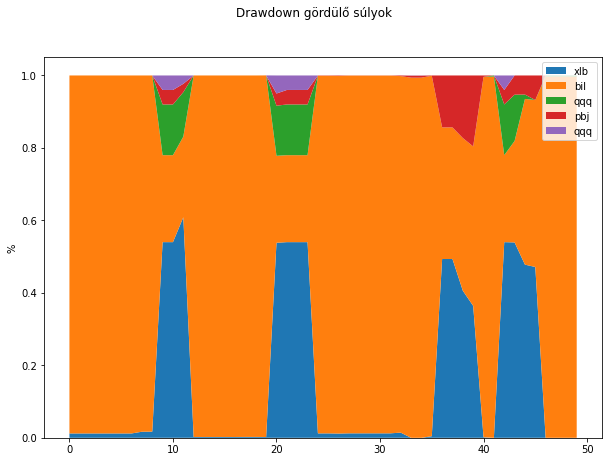

In [72]:
#@title
#x=df_bil['Date']
ay = megoldas3_2['x1']
by = megoldas3_2['x2']
cy = megoldas3_2['x3']
dy = megoldas3_2['x4']
ey = megoldas3_2['x5']
y = np.vstack([ay,  by, cy,dy,ey]) #y = np.vstack([ay, by, cy,dy,ey])

# plot
fig, ax = plt.subplots(figsize=(10,7))
ax.stackplot(megoldas3_2.index, y)
plt.legend(['xlb','bil','qqq','pbj','qqq'])
plt.suptitle('Drawdown gördülő súlyok')
plt.ylabel('%')
plt.savefig("gordulodraw.png") 
plt.show()

In [73]:
#@title
from pathlib import Path  
filepath = Path('/content/drive/My Drive/numpu4/beadando_etfs/megoldas3_2.csv')  #'/content/drive/My Drive/numpu4/beadando_etfs/DBE.csv'
filepath.parent.mkdir(parents=True, exist_ok=True)  
megoldas3_2.to_csv(filepath)

In [74]:
#@title
############Returnök számolása a csúszóablakokhoz

In [75]:
#@title
df_suly3_2=megoldas3_2[['x1','x2','x3','x4','x5']] #Adatbázis létrehozása a súlyoknak
sulyarray2=[]
for i in range(len(df_suly1_2['x1'])):
  sulyarray2.append([])
  for j in range(5):
    sulyarray2[i].append(df_suly1_2[df_suly1_2.columns[j]][i])
  sulyarray2[i]=np.array(sulyarray[i])

In [76]:
#@title
#Ellenőrzés
print(sulyarray2[1])

[8.01746895e-03 9.89116242e-01 1.43798738e-03 1.42830205e-03
 1.09212277e-13]


In [77]:
#@title
#Üres adatbázis a returnöknek
gordreturn_dd=pd.DataFrame(columns={'return'})
gordreturn_dd['return']=np.zeros(len(df_suly3_2['x1']))

In [78]:
#@title
#A returnök és szórások kiszámolása a csúszóablakos módszernél
gordreturn_dd['return']=np.zeros(len(megoldas3_2['x1']))
gordreturn_dd['szoras']=np.zeros(len(megoldas3_2['x1']))
for i in range(len(megoldas3_2['x1'])):  
  gordreturn_dd['return'][i]=minden(df_hozam_gsh[i:(i+5*252)],sulyarray[i])[0]
  gordreturn_dd['szoras'][i]=minden(df_hozam_gsh[i:(i+5*252)],sulyarray[i])[1] #Itt is átlaghozamokkal ill. szórásokkal számolunk, hogy tudjuk ábrázolni
  #df_ret[df_ret.columns[1]]*megoldas1_2['x1'][i] #pbj #az index 1-nél indul, mert a 0. az yc
  

In [79]:
#@title
#Dátum beállítása
gordreturn_dd['Date']=np.zeros
for i in range(len(gordreturn_dd)):
  gordreturn_dd['Date'][i]=df_bil['Date'][200+i]
print(gordreturn_dd.head(4))
#gordreturn_dd.index = pd.to_datetime(gordreturn_dd.index)

     return    szoras        Date
0  0.004153  0.007795  2008-10-16
1  0.004258  0.007791  2008-10-17
2  0.004428  0.007787  2008-10-20
3  0.004177  0.007780  2008-10-21


<ipython-input-79-a65bb3cfbe87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gordreturn_dd['Date'][i]=df_bil['Date'][200+i]


In [80]:
#@title
#Dátum beállítása
gordreturn_dd=gordreturn_dd.set_index('Date')


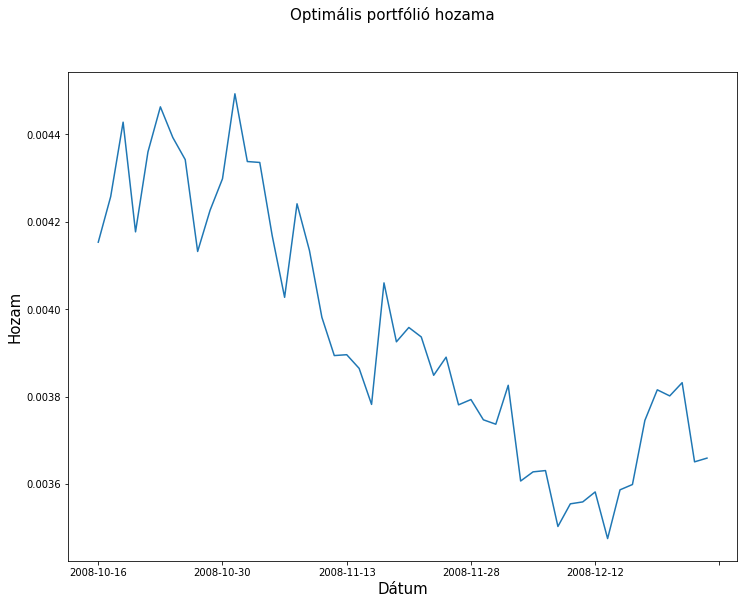

In [81]:
#@title
plt.figure(figsize=(12, 9))
gordreturn_dd['return'].plot()
plt.suptitle('Optimális portfólió hozama', fontsize=15)
plt.ylabel('Hozam', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("drawgordopthozam.png") 
plt.show()

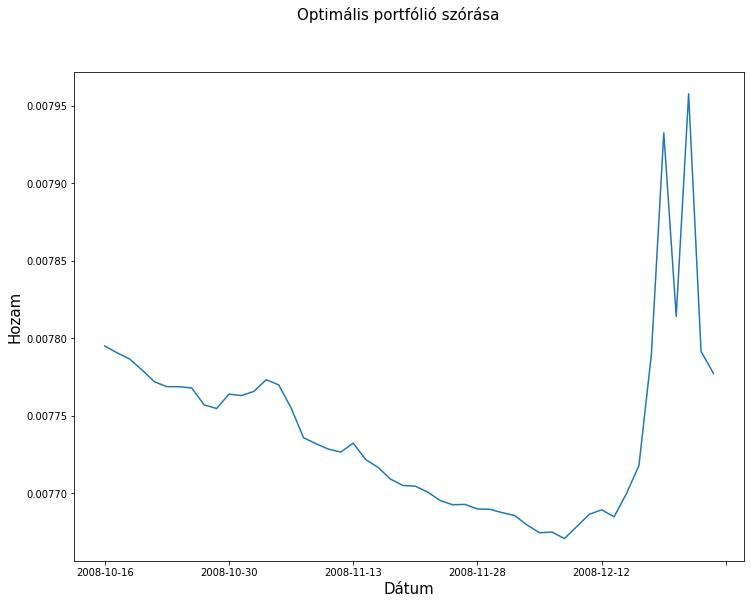

In [82]:
#@title
plt.figure(figsize=(12, 9))
gordreturn_dd['szoras'].plot() #Együtt mozog a kettő, minél kisebb a szórás, annál kisebb a különbség is az egyes elemek között
plt.suptitle('Optimális portfólió szórása', fontsize=15)
plt.ylabel('Hozam', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("drawgordoptszoras.png") 
plt.show()

In [83]:
#@title
#hozamdf(df_hozam2[(start+k):(start+5*252+k)],df_ret,ww)

##Példa a minimalizálásra

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [84]:
fun = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2

bnds = ((0, None), (0, None))

cons = ({'type': 'ineq', 'fun': lambda x:  x[0] - 2 * x[1] + 2},
        {'type': 'ineq', 'fun': lambda x: -x[0] - 2 * x[1] + 6},
        {'type': 'ineq', 'fun': lambda x: -x[0] + 2 * x[1] + 2})

res = scipy.optimize.minimize(fun, (2, 0), method='SLSQP', bounds=bnds,
               constraints=cons)

In [85]:
res

     fun: 0.8000000011920985
     jac: array([ 0.80000002, -1.59999999])
 message: 'Optimization terminated successfully'
    nfev: 10
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1.4, 1.7])

# Ábrák

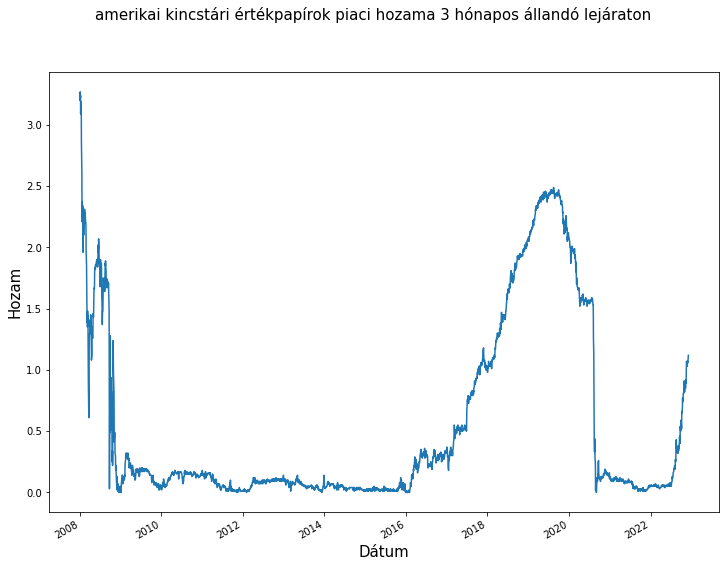

In [86]:
plt.figure(figsize=(12, 9))
plt.suptitle('amerikai kincstári értékpapírok piaci hozama 3 hónapos állandó lejáraton', fontsize=15)
df_hozam['yc'].plot()
plt.ylabel('Hozam', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("yc_hozam.png") 
plt.show()

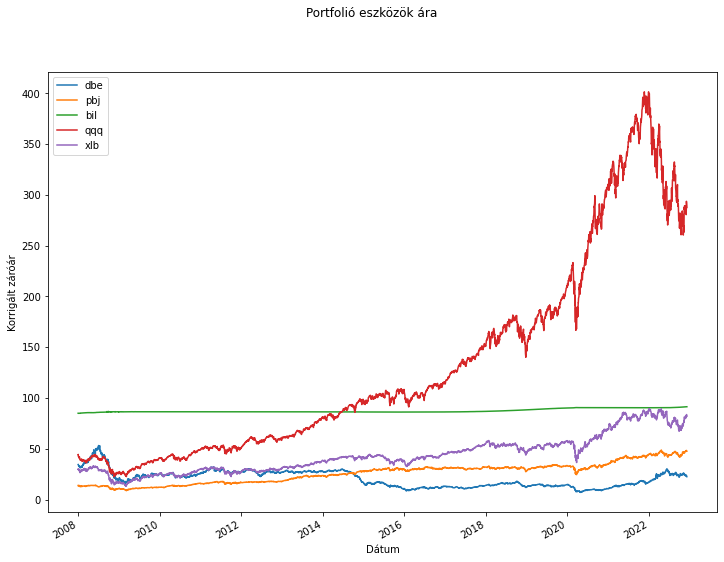

In [87]:
df_hozam.plot( y=['dbe','pbj','bil','qqq', 'xlb'], figsize=(12,9))
plt.suptitle('Portfolió eszközök ára')
plt.ylabel('Korrigált záróár')
plt.xlabel('Dátum')
plt.savefig("assets-adjclose.png") 
plt.show()

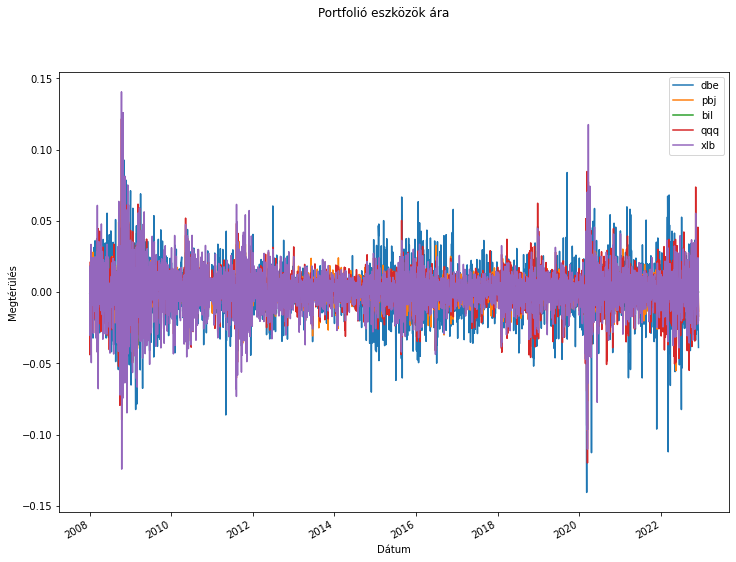

In [88]:
df_ret.head(50)
df_ret.plot( y=['dbe','pbj','bil','qqq', 'xlb'], figsize=(12,9))
plt.suptitle('Portfolió eszközök ára')
plt.ylabel('Megtérülés')
plt.xlabel('Dátum')
plt.savefig("assets-return.png") 
plt.show()


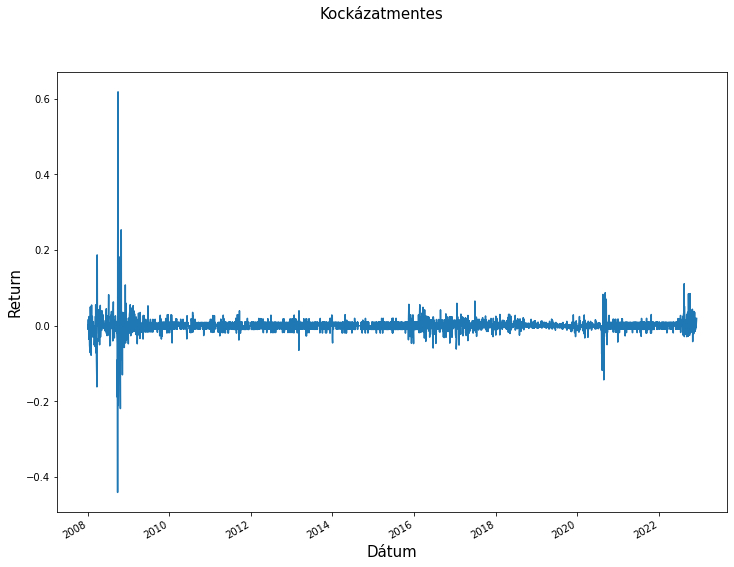

In [89]:
plt.figure(figsize=(12, 9))
plt.suptitle('Kockázatmentes', fontsize=15)
df_ret['yc'].plot()
plt.ylabel('Return', fontsize=15)
plt.xlabel('Dátum', fontsize=15)
plt.savefig("yc_return.png") 
plt.show()